In [1]:
import pandas as pd 
import numpy as np 
from stephentools import get_file
from stephentools import data_d3
from stephentools import analyse_feature_importance
from stephentools import visualize_decision_tree
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

In [2]:
df = get_file()
df,X,y,X_train, X_test, y_train, y_test=data_d3()
rs=42

# DEFAULT 

In [3]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred_1 = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.8561190738699008
Test accuracy: 0.7970330411328388
              precision    recall  f1-score   support

       False       0.85      0.82      0.84       940
        True       0.71      0.75      0.73       543

    accuracy                           0.80      1483
   macro avg       0.78      0.79      0.78      1483
weighted avg       0.80      0.80      0.80      1483

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [4]:
model_2 = MLPClassifier(random_state=42, max_iter=250)
model_2.fit(X_train, y_train)
print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))
y_pred_2 = model_2.predict(X_test)

Train accuracy: 0.8616317530319736
Test accuracy: 0.799055967633176


# TUNED 

In [5]:
params = {'hidden_layer_sizes': [(x,) for x in range(100, 200, 20)], 'activation':['tanh']}

model_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
model_3.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh'],
                    

In [22]:
print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))
y_pred_2 = model_3.predict(X_test)
model_4.best_params_

Train accuracy: 0.9137265711135611
Test accuracy: 0.7997302764666218


{'hidden_layer_sizes': (145,)}

In [7]:
params = {'hidden_layer_sizes': [(x,) for x in range(130, 160, 15)]}

model_4 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
model_4.fit(X_train, y_train)

print("Train accuracy:", model_4.score(X_train, y_train))
print("Test accuracy:", model_4.score(X_test, y_test))

y_pred = model_4.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_4.best_params_)

Train accuracy: 0.8497794928335171
Test accuracy: 0.7835468644639245
              precision    recall  f1-score   support

       False       0.84      0.81      0.83       940
        True       0.69      0.73      0.71       543

    accuracy                           0.78      1483
   macro avg       0.77      0.77      0.77      1483
weighted avg       0.79      0.78      0.78      1483

{'hidden_layer_sizes': (145,)}


In [8]:
model_5 = MLPClassifier(hidden_layer_sizes=165, max_iter=1000, solver='lbfgs', random_state=42, activation='tanh')
model_5.fit(X_train, y_train)

print("Train accuracy:", model_5.score(X_train, y_train))
print("Test accuracy:", model_5.score(X_test, y_test))

y_pred = model_5.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_5)

Train accuracy: 0.824696802646086
Test accuracy: 0.8044504383007417
              precision    recall  f1-score   support

       False       0.81      0.90      0.85       940
        True       0.79      0.64      0.70       543

    accuracy                           0.80      1483
   macro avg       0.80      0.77      0.78      1483
weighted avg       0.80      0.80      0.80      1483

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=165, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


AttributeError: 'MLPClassifier' object has no attribute 'best_params_'

In [9]:
model_6 = MLPClassifier(hidden_layer_sizes=145, max_iter=700, solver='adam', random_state=42, activation='tanh')
model_6.fit(X_train, y_train)

print("Train accuracy:", model_6.score(X_train, y_train))
print("Test accuracy:", model_6.score(X_test, y_test))

y_pred = model_6.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_6)

Train accuracy: 0.9798787210584344
Test accuracy: 0.7936614969656103
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       940
        True       0.74      0.68      0.71       543

    accuracy                           0.79      1483
   macro avg       0.78      0.77      0.77      1483
weighted avg       0.79      0.79      0.79      1483

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=145, learning_rate='constant',
              learning_rate_init=0.001, max_iter=700, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [11]:
model_7 = MLPClassifier(hidden_layer_sizes=165, max_iter=1000, solver='lbfgs', random_state=42, activation='logistic')
model_7.fit(X_train, y_train)

print("Train accuracy:", model_7.score(X_train, y_train))
print("Test accuracy:", model_7.score(X_test, y_test))

y_pred = model_7.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_7)

Train accuracy: 0.831587651598677
Test accuracy: 0.7970330411328388
              precision    recall  f1-score   support

       False       0.81      0.89      0.85       940
        True       0.77      0.64      0.70       543

    accuracy                           0.80      1483
   macro avg       0.79      0.76      0.77      1483
weighted avg       0.79      0.80      0.79      1483

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=165, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [32]:
model_z = MLPClassifier(hidden_layer_sizes=165, max_iter=300, solver='adam', random_state=42, activation='tanh',alpha= 0.05)
model_z.fit(X_train, y_train)

print("Train accuracy:", model_z.score(X_train, y_train))
print("Test accuracy:", model_z.score(X_test, y_test))

y_pred = model_z.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_z)

Train accuracy: 0.863561190738699
Test accuracy: 0.7936614969656103
              precision    recall  f1-score   support

       False       0.78      0.94      0.85       940
        True       0.85      0.53      0.65       543

    accuracy                           0.79      1483
   macro avg       0.81      0.74      0.75      1483
weighted avg       0.80      0.79      0.78      1483

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=165, learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


# Chart 

In [44]:
y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_nn_3 = model_3.predict_proba(X_test)
y_pred_proba_nn_4 = model_4.predict_proba(X_test)
y_pred_proba_nn_5 = model_5.predict_proba(X_test)
y_pred_proba_nn_6 = model_6.predict_proba(X_test)
y_pred_proba_nn_7 = model_7.predict_proba(X_test)
y_pred_proba_nn_z = model_z.predict_proba(X_test)
y_pred_proba_cv_sel_model = model_8.predict_proba(X_test_sel_model)



roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_nn_3 = roc_auc_score(y_test, y_pred_proba_nn_3[:, 1])
roc_index_nn_4 = roc_auc_score(y_test, y_pred_proba_nn_4[:, 1])
roc_index_nn_5 = roc_auc_score(y_test, y_pred_proba_nn_5[:, 1])
roc_index_nn_6 = roc_auc_score(y_test, y_pred_proba_nn_6[:, 1])
roc_index_nn_7 = roc_auc_score(y_test, y_pred_proba_nn_7[:, 1])
roc_index_nn_z = roc_auc_score(y_test, y_pred_proba_nn_z[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for model_1:", roc_index_nn_1)
print("ROC index on test for model_2:", roc_index_nn_2)
print("ROC index on test for model_3:", roc_index_nn_3)
print("ROC index on test for model_4:", roc_index_nn_4)
print("ROC index on test for model_5:", roc_index_nn_5)
print("ROC index on test for model_6:", roc_index_nn_6)
print("ROC index on test for model_7:", roc_index_nn_7)
print("ROC index on test for model_z:", roc_index_nn_z)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)
#print("ROC index on test for NN with feature selection (model selection) and gridsearch two:", roc_index_nn_y)

ROC index on test for model_1: 0.8688139179499236
ROC index on test for model_2: 0.8670761333803534
ROC index on test for model_3: 0.8640159084675365
ROC index on test for model_4: 0.8542122173896007
ROC index on test for model_5: 0.8645507621174718
ROC index on test for model_6: 0.8519650483915209
ROC index on test for model_7: 0.8504427726186278
ROC index on test for model_z: 0.8750911014458681
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8503232631950158


In [45]:
fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_nn_3[:,1])
fpr_cv_4, tpr_cv_4, thresholds_cv_4 = roc_curve(y_test, y_pred_proba_nn_4[:,1])
fpr_cv_5, tpr_cv_5, thresholds_cv_5 = roc_curve(y_test, y_pred_proba_nn_5[:,1])
fpr_nn_6, tpr_nn_6, thresholds_nn_6 = roc_curve(y_test, y_pred_proba_nn_6[:, 1])
fpr_nn_7, tpr_nn_7, thresholds_nn_7 = roc_curve(y_test, y_pred_proba_nn_7[:, 1])
fpr_nn_z, tpr_nn_z, thresholds_nn_z = roc_curve(y_test, y_pred_proba_nn_z[:, 1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:, 1])

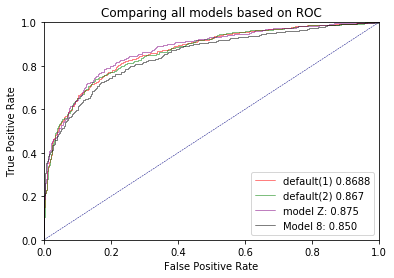

In [50]:
import matplotlib.pyplot as plt
plt.plot(fpr_nn_1, tpr_nn_1, label='default(1) {:.4f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='default(2) {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
"""


plt.plot(fpr_cv_3, tpr_cv_3, label='model 3 {:.3f}'.format(roc_index_nn_3), color='blue', lw=0.5)
plt.plot(fpr_cv_4, tpr_cv_4, label='model 4 {:.3f}'.format(roc_index_nn_4), color='yellow', lw=0.5)
plt.plot(fpr_cv_5, tpr_cv_5, label='model 5 {:.3f}'.format(roc_index_nn_5), color='cyan', lw=0.5)
plt.plot(fpr_nn_6, tpr_nn_6, label='model 6 {:.3f}'.format(roc_index_nn_6), color='gray', lw=0.5)
plt.plot(fpr_nn_7, tpr_nn_7, label='model 7 {:.3f}'.format(roc_index_nn_6), color='white', lw=0.5)
"""
plt.plot(fpr_nn_z, tpr_nn_z, label='model Z: {:.3f}'.format(roc_index_nn_z), color='purple', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='Model 8: {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)
#plt.plot(fpr_nn_df2,tpr_nn_df2, label='NN default but converged {:.3f}'.format(roc_index_nn_y), color='pink', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing all models based on ROC')
plt.legend(loc="lower right")
plt.show()

# Selected DTree

In [33]:
import pickle
with open('DTT.pickle', 'rb') as f:
    dt_best,roc_index_dt_best, fpr_dt_best, tpr_dt_best = pickle.load(f)

print(dt_best)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [34]:
analyse_feature_importance(dt_best, X.columns)

covid19_symptoms : 0.3413410241684238
income_med : 0.18583591701192714
worried : 0.10597455395847406
working_travel critical : 0.058456086094415056
health_worker : 0.029439756971372532
house_count : 0.02846692453189881
insurance : 0.023375679022204356
weight : 0.022865605806404263
risk_mortality : 0.022056023109254124
race_white : 0.021000208218148336
contacts_count : 0.016268617887987565
covid19_contact : 0.016206941039674228
age_70_80 : 0.015852509441646016
height : 0.015429613628938533
age_60_70 : 0.010948533352158472
immigrant : 0.010781599055408436
country_BR : 0.010712895934315132
age_20_30 : 0.009095618572086035
country_US : 0.008013776318196587
age_40_50 : 0.007704844036732804


In [35]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(3628, 21)


In [38]:
model_8 = MLPClassifier(hidden_layer_sizes=16, solver='adam', random_state=42, activation='tanh',alpha= 0.05)
model_8.fit(X_train_sel_model, y_train)

print("Train accuracy:", model_8.score(X_train_sel_model, y_train))
print("Test accuracy:", model_8.score(X_test_sel_model, y_test))

y_pred = model_8.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(model_8)

Train accuracy: 0.804851157662624
Test accuracy: 0.7929871881321645
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       940
        True       0.73      0.68      0.71       543

    accuracy                           0.79      1483
   macro avg       0.78      0.77      0.77      1483
weighted avg       0.79      0.79      0.79      1483

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [39]:
params = {'hidden_layer_sizes': [(x,) for x in range(1,20, 1)],'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.804851157662624
Test accuracy: 0.7929871881321645
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       940
        True       0.73      0.68      0.71       543

    accuracy                           0.79      1483
   macro avg       0.78      0.77      0.77      1483
weighted avg       0.79      0.79      0.79      1483

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (16,), 'solver': 'adam'}


Total number of models:  152


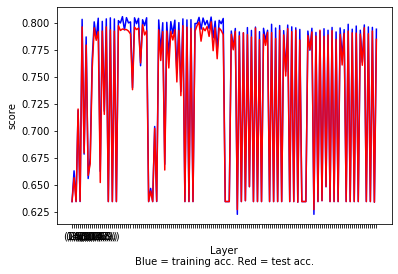

In [43]:
result_set = cv_sel_model.cv_results_
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Layer\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[(x,) for x in range(1,20, 1)])
plt.ylabel('score')
plt.show()


In [42]:
def printMLPArchitecture(model):

    print("Number of Layers: ",model.n_layers_ )
    print("The First layer is Input Layer, and the last layer is the output layer")
    for i, w in enumerate(model.coefs_):
        print("{} Layer with hidden size {}".format(i+1, w.shape[0]))
        if (i+1) == len(model.coefs_):
            print("{} Layer with hidden size {}".format(i+2, w.shape[1]))
    
    print("The activation function: ", model.activation)
    print("The alpha function: ",model.alpha)
    print("The solver function: ", model.solver)
            
printMLPArchitecture(model_z)

Number of Layers:  3
The First layer is Input Layer, and the last layer is the output layer
1 Layer with hidden size 166
2 Layer with hidden size 165
3 Layer with hidden size 1
The activation function:  tanh
The alpha function:  0.05
The solver function:  adam
